This file runs the density estimator and assumes all the sampled goals are achieved. This lets us then check
how fast the density estimator actually expands

In [8]:
from copy import copy
import matplotlib.pyplot as plt
import numpy as np

from nocturne_utils.density_estimators import RawKernelDensity

In [9]:
optimize_every = 10
num_optim_samples = 1003
initial_samples = np.random.uniform(low=-20, high=20, size=(int(num_optim_samples/3), 2))
initial_samples = np.vstack((initial_samples, np.random.uniform(low=[-20, 20], high=[20, 200], size=(int(num_optim_samples/3), 2))))
initial_samples = np.vstack((initial_samples, np.random.uniform(low=[-20, -20], high=[200, 20], size=(int(num_optim_samples/3), 2))))

In [10]:
def plot_goal_distribution():
    fig, ax = plt.subplots()
    rkd.plot_density_info(num_optim_samples, 'b')
    plt.hlines(42, -400, 400)
    plt.hlines(-42, -400, 400)
    plt.vlines(42, -400, 400)
    plt.vlines(-42, -400, 400)
    plt.xlim([-430, 430])
    plt.ylim([-430, 430])
    plt.show()
    plt.close(fig)

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


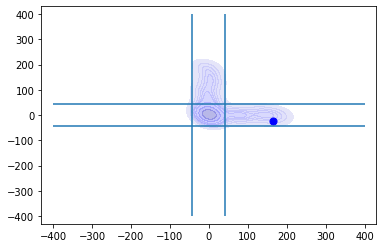

In [11]:
rkd = RawKernelDensity(optimize_every=optimize_every, num_optim_samples=num_optim_samples)
for sample in initial_samples:
    rkd.add_sample(sample)
rkd._optimize(force=True)
# quick plot to make sure everything is alright
plot_goal_distribution()

In [12]:
def add_data_and_walk(num_walk_after_goal):
    new_goal = rkd.draw_min_sample(200)
    rkd.add_sample(new_goal)
    # do a uniform walk - TODO we can probably do something
    for _ in range(num_walk_after_goal):
        new_goal = new_goal + 5 * np.random.normal(size=(2,))
        if (new_goal[0] < -42 and new_goal[1] > 42) or (new_goal[0] > 42 and new_goal[1] > 42) or \
                    (new_goal[0] < -42 and new_goal[1] < -42) or (new_goal[0] > 42 and new_goal[1] < -42) or \
                    (np.any(new_goal > 380) or np.any(new_goal < -380)):
            break
        else:
            rkd.add_sample(new_goal)

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


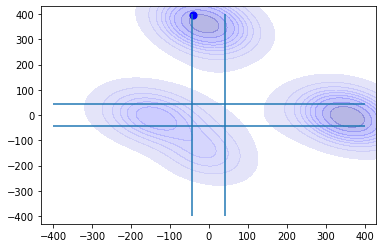

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


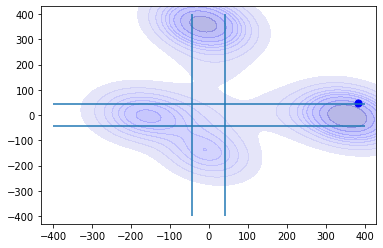

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


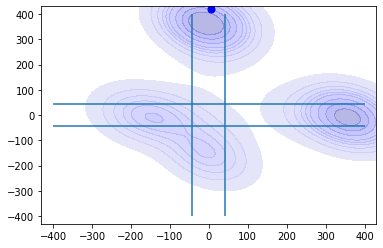

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


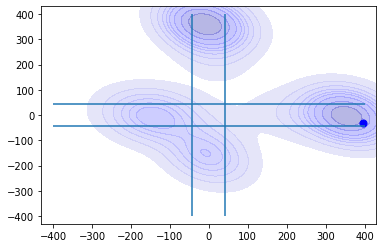

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


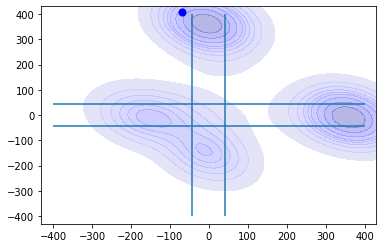

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


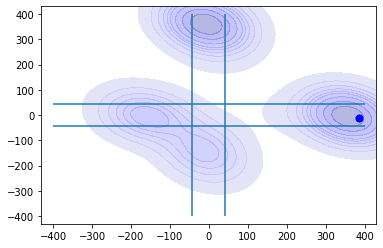

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


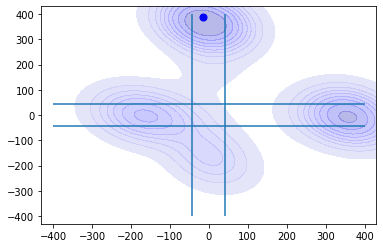

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


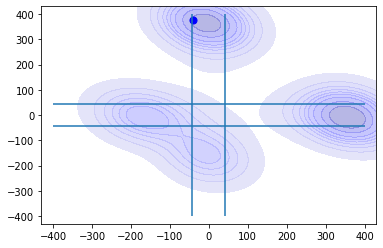

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


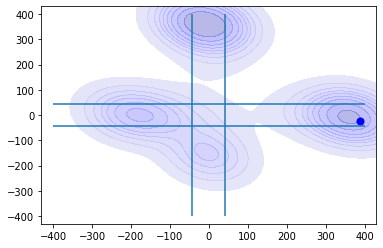

/private/home/eugenevinitsky/.conda/envs/nocturned/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


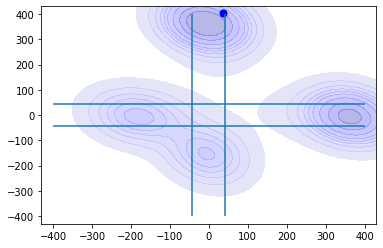

In [15]:
total_steps = 2000
plot_every = 200
for i in range(total_steps):
    add_data_and_walk(20)
    rkd._optimize()
    if i % plot_every == 0:
        plot_goal_distribution()